In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from plot_scripts import plot_dataset_compare_3

### Speech dataset analysis


num clients: 542
normal: variance: 17 for max of 22 and min of 5
EUR mean 0.995857142857143
num clients: 542
enhanced: variance: 13 for max of 14 and min of 1
EUR mean 0.999857142857143
num clients: 542
prox: variance: 17 for max of 22 and min of 5
EUR mean 0.992
num clients: 542
normal: variance: 21 for max of 33 and min of 12
EUR mean 0.9000833333333335
num clients: 542
enhanced: variance: 36 for max of 41 and min of 5
EUR mean 0.9736666666666667
num clients: 542
prox: variance: 20 for max of 32 and min of 12
EUR mean 0.8970833333333333
num clients: 542
normal: variance: 23 for max of 34 and min of 11
EUR mean 0.6990000000000001
num clients: 542
enhanced: variance: 27 for max of 33 and min of 6
EUR mean 0.91825
num clients: 542
prox: variance: 21 for max of 34 and min of 13
EUR mean 0.6968333333333333
num clients: 542
normal: variance: 20 for max of 31 and min of 11
EUR mean 0.49616666666666664
num clients: 542
enhanced: variance: 38 for max of 44 and min of 6
EUR mean 0.864250000000

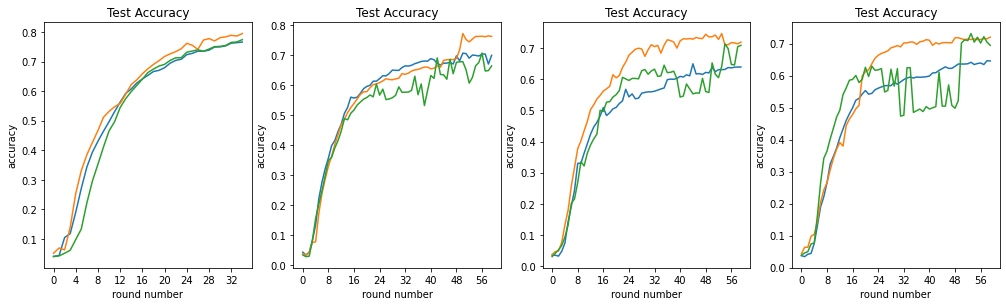

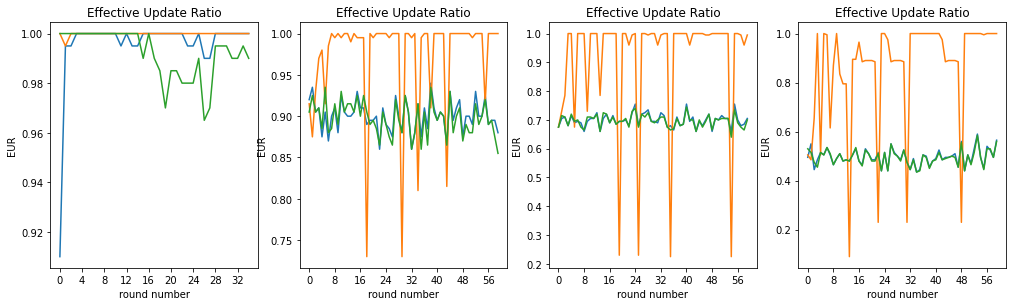

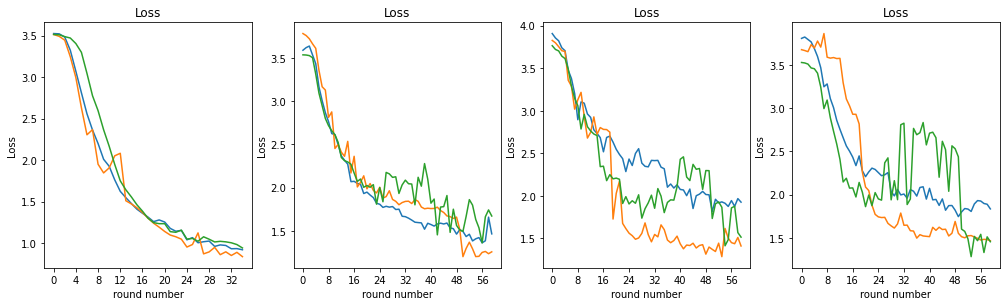

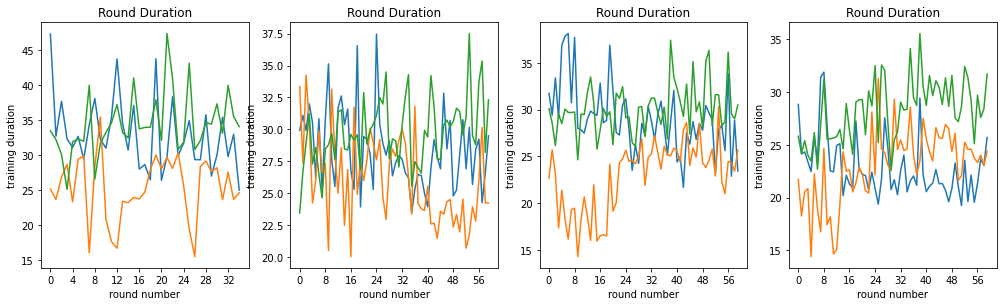

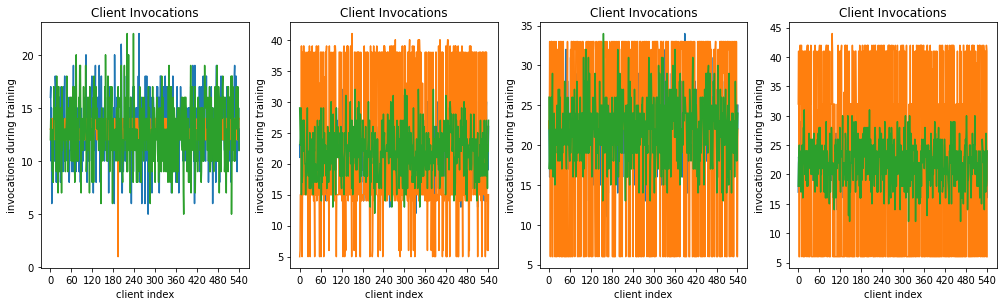

In [2]:
base_path = "../../out/real_world/speech_dataset"
dataset_titles = ["speech-0","speech-0.1","speech-0.3","speech-0.5"]

path_normals = [f'{base_path}/speech-0',f'{base_path}/speech-0.1',f'{base_path}/speech-0.3',f'{base_path}/speech-0.5']
path_prox = [f'{base_path}/speech-prox-0',f'{base_path}/speech-prox-0.1',f'{base_path}/speech-prox-0.3',f'{base_path}/speech-prox-0.5']

path_enhanced = [f'{base_path}/speech-enhanced-0',f'{base_path}/speech-enhanced-0.1',f'{base_path}/speech-enhanced-0.3',f'{base_path}/speech-enhanced-0.5']


plot_dataset_compare_3(path_normals,path_enhanced,path_prox,dataset_titles)

### Mnist dataset analysis

num clients: 297
normal: variance: 19 for max of 49 and min of 30
EUR mean 0.9900000000000002
num clients: 297
enhanced: variance: 1 for max of 41 and min of 40
EUR mean 0.999
num clients: 297
prox: variance: 19 for max of 48 and min of 29
EUR mean 0.9750833333333334
num clients: 300
normal: variance: 25 for max of 53 and min of 28
EUR mean 0.8980833333333335
num clients: 300
enhanced: variance: 40 for max of 44 and min of 4
EUR mean 0.9838333333333333
num clients: 300
prox: variance: 21 for max of 50 and min of 29
EUR mean 0.8809166666666667
num clients: 300
normal: variance: 20 for max of 49 and min of 29
EUR mean 0.6980000000000002
num clients: 300
enhanced: variance: 52 for max of 56 and min of 4
EUR mean 0.9659166666666666
num clients: 300
prox: variance: 21 for max of 50 and min of 29
EUR mean 0.6858333333333333
num clients: 300
normal: variance: 20 for max of 48 and min of 28
EUR mean 0.499
num clients: 300
enhanced: variance: 48 for max of 60 and min of 12
EUR mean 0.7403333333

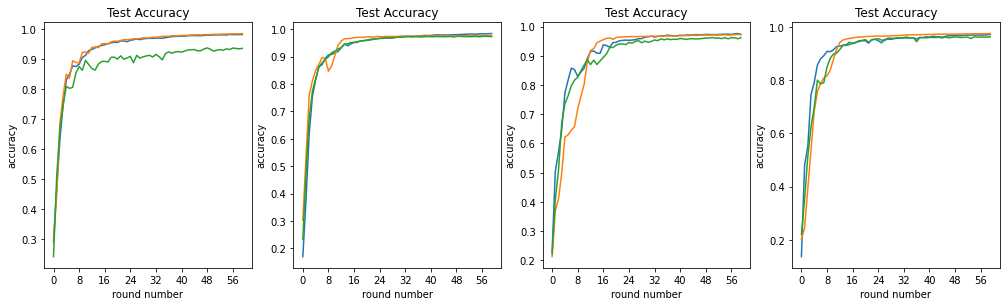

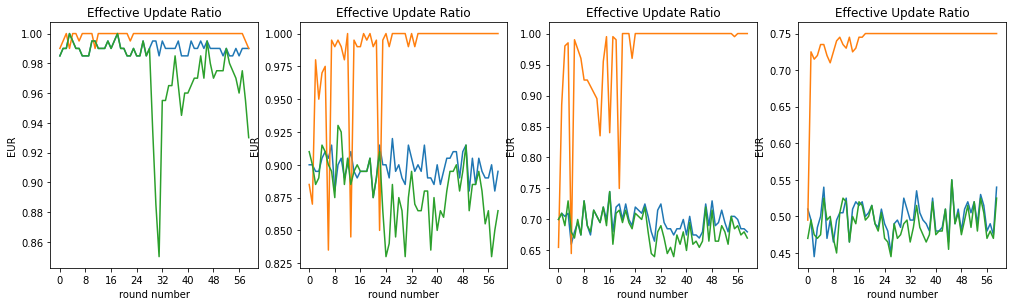

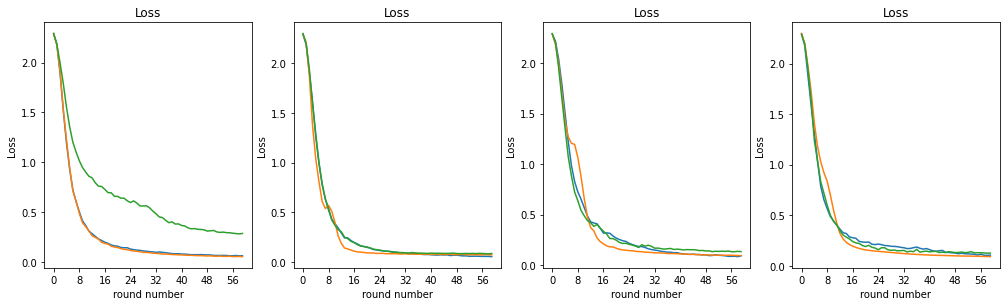

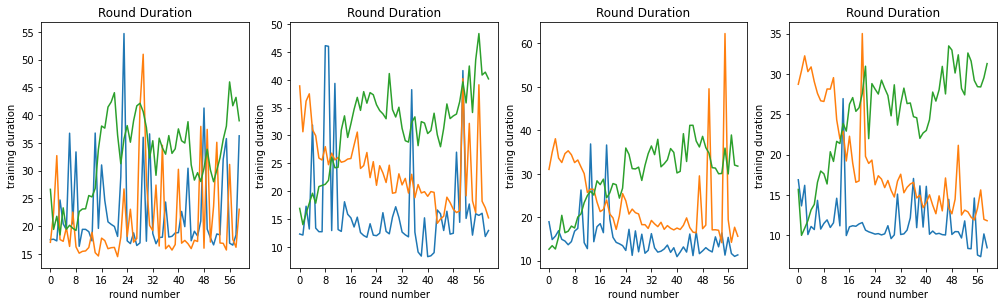

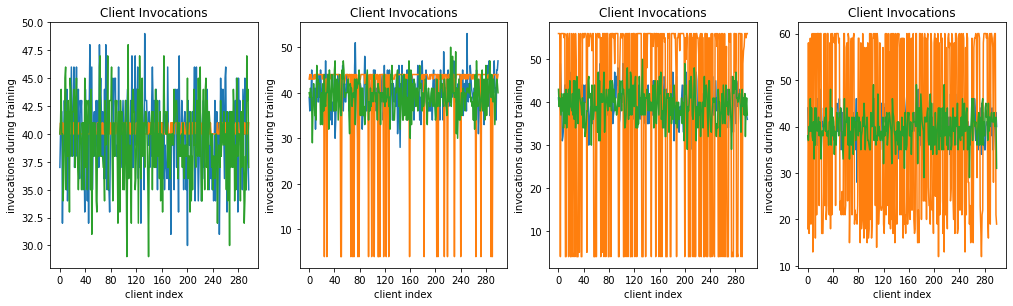

In [3]:
base_path = "../../out/real_world/mnist_dataset"
dataset_titles = ["mnist-0","mnist-0.1","mnist-0.3","mnist-0.5"]

path_normals = [f'{base_path}/mnist-0',f'{base_path}/mnist-0.1',f'{base_path}/mnist-0.3',f'{base_path}/mnist-0.5']
path_prox = [f'{base_path}/mnist-prox-0',f'{base_path}/mnist-prox-0.1',f'{base_path}/mnist-prox-0.3',f'{base_path}/mnist-prox-0.5']

path_enhanced = [f'{base_path}/mnist-enhanced-0',f'{base_path}/mnist-enhanced-0.1',f'{base_path}/mnist-enhanced-0.3',f'{base_path}/mnist-enhanced-0.5']


plot_dataset_compare_3(path_normals,path_enhanced,path_prox,dataset_titles)

### Femnist dataset analysis

num clients: 300
normal: variance: 22 for max of 32 and min of 10
EUR mean 0.9955714285714287
num clients: 300
enhanced: variance: 13 for max of 24 and min of 11
EUR mean 0.9960000000000001
num clients: 300
prox: variance: 21 for max of 31 and min of 10
EUR mean 0.9622857142857143
num clients: 300
normal: variance: 18 for max of 38 and min of 20
EUR mean 0.8973714285714286
num clients: 300
enhanced: variance: 21 for max of 26 and min of 5
EUR mean 0.9774285714285714
num clients: 300
prox: variance: 20 for max of 32 and min of 12
EUR mean 0.804
num clients: 300
normal: variance: 19 for max of 33 and min of 14
EUR mean 0.6894285714285714
num clients: 300
enhanced: variance: 27 for max of 32 and min of 5
EUR mean 0.9302857142857143
num clients: 300
prox: variance: 21 for max of 31 and min of 10
EUR mean 0.6401428571428571
num clients: 300
normal: variance: 19 for max of 34 and min of 15
EUR mean 0.49742857142857144
num clients: 300
enhanced: variance: 35 for max of 40 and min of 5
EUR mea

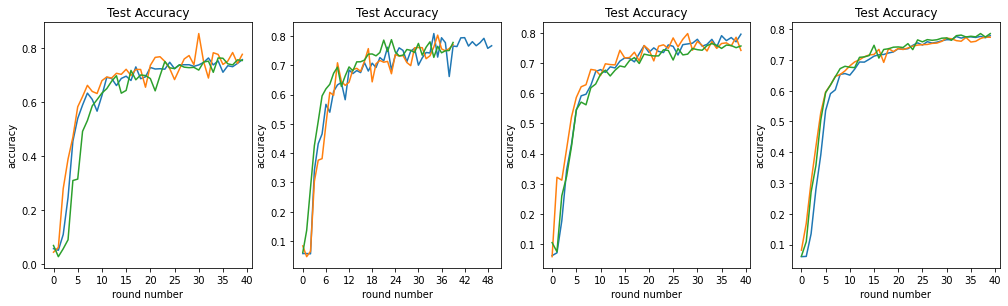

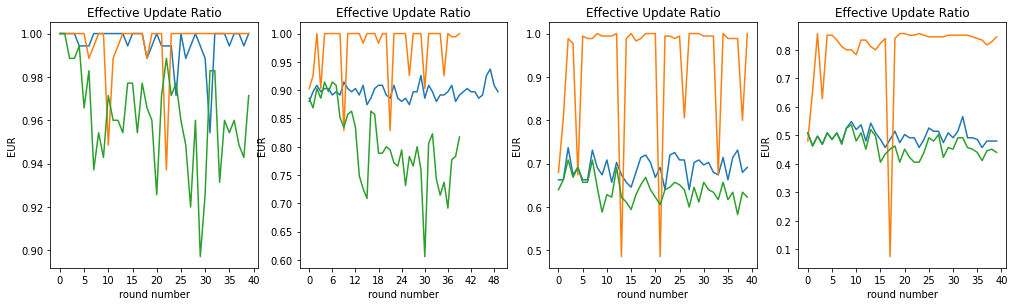

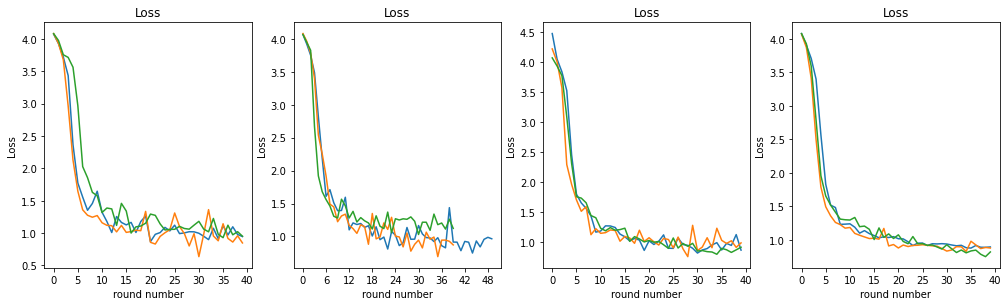

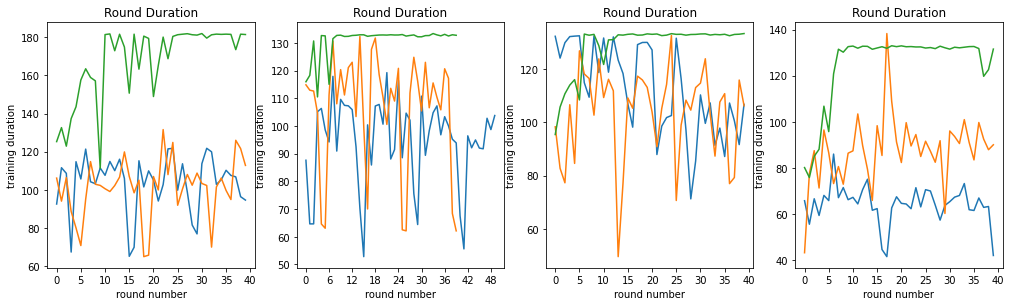

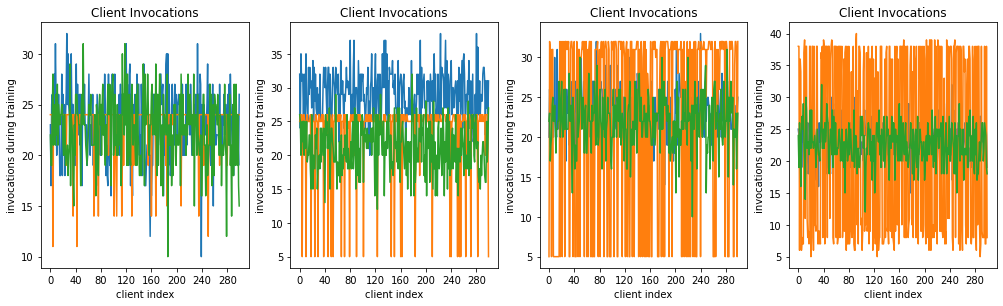

In [4]:
base_path = "../../out/real_world/femnist_dataset"
dataset_titles = ["femnist-0","femnist-0.1","femnist-0.3","femnist-0.5"]

path_normals = [f'{base_path}/femnist-0',f'{base_path}/femnist-0.1',f'{base_path}/femnist-0.3',f'{base_path}/femnist-0.5--1']
path_prox = [f'{base_path}/femnist-prox-0',f'{base_path}/femnist-prox-0.1',f'{base_path}/femnist-prox-0.3',f'{base_path}/femnist-prox-0.5-0--1']

path_enhanced = [f'{base_path}/femnist-enhanced-0',f'{base_path}/femnist-enhanced-0.1',f'{base_path}/femnist-enhanced-0.3',f'{base_path}/femnist-enhanced-0.5-expo-1']


plot_dataset_compare_3(path_normals,path_enhanced,path_prox,dataset_titles)

### Sheakspeare dataset

num clients: 90
normal: variance: 12 for max of 18 and min of 6
EUR mean 0.8784000000000001
num clients: 91
enhanced: variance: 15 for max of 16 and min of 1
EUR mean 0.9384
num clients: 91
prox: variance: 14 for max of 18 and min of 4
EUR mean 0.8648
num clients: 93
normal: variance: 16 for max of 17 and min of 1
EUR mean 0.796
num clients: 93
enhanced: variance: 17 for max of 18 and min of 1
EUR mean 0.9072
num clients: 92
prox: variance: 11 for max of 17 and min of 6
EUR mean 0.7792
num clients: 92
normal: variance: 10 for max of 17 and min of 7
EUR mean 0.5952000000000001
num clients: 97
enhanced: variance: 17 for max of 18 and min of 1
EUR mean 0.868
num clients: 92
prox: variance: 11 for max of 17 and min of 6
EUR mean 0.58
num clients: 94
normal: variance: 12 for max of 19 and min of 7
EUR mean 0.41759999999999997
num clients: 94
enhanced: variance: 19 for max of 24 and min of 5
EUR mean 0.7328
num clients: 94
prox: variance: 11 for max of 18 and min of 7
EUR mean 0.4096


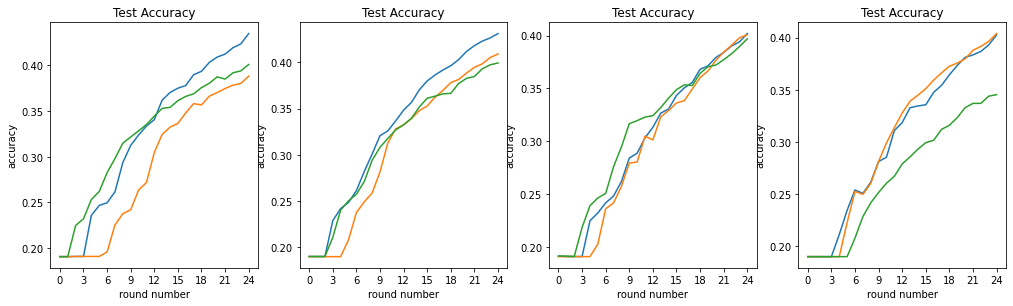

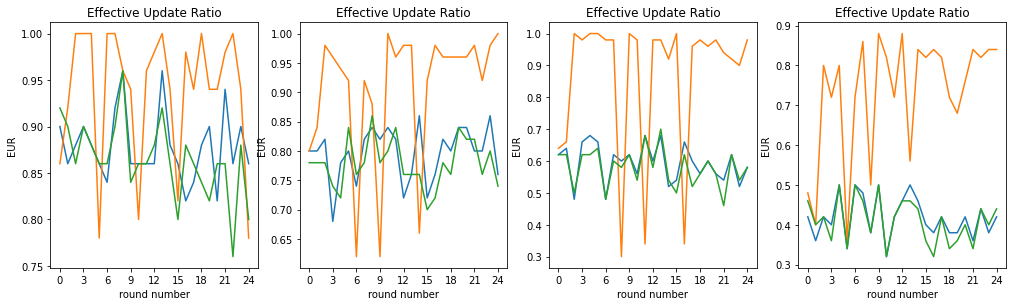

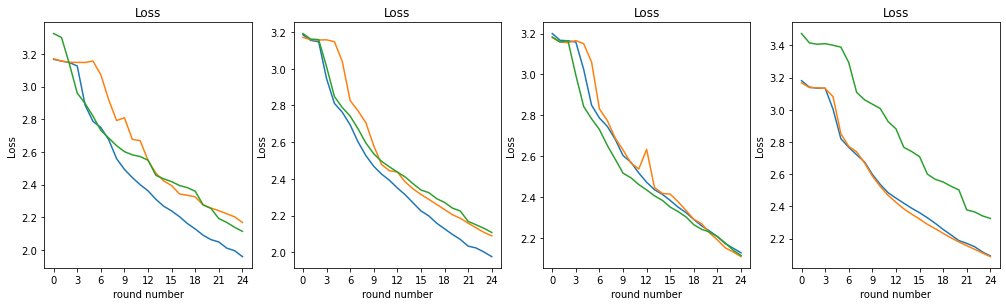

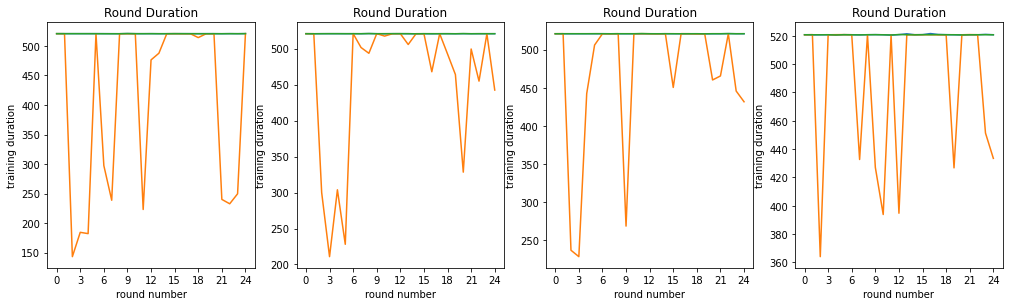

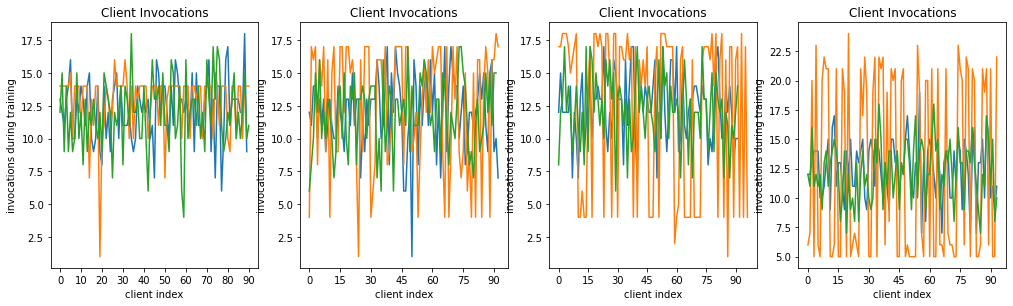

In [5]:
base_path = "../../out/real_world/shakespeare_dataset"
dataset_titles = ["shakespeare-0","shakespeare-0.1","shakespeare-0.3","shakespeare-0.5"]

path_normals = [f'{base_path}/shakespeare-0',f'{base_path}/shakespeare-0.1',f'{base_path}/shakespeare-0.3',f'{base_path}/shakespeare-0.5']
path_prox = [f'{base_path}/shakespeare-prox-0',f'{base_path}/shakespeare-prox-0.1',f'{base_path}/shakespeare-prox-0.3',f'{base_path}/shakespeare-prox-0.5']

path_enhanced = [f'{base_path}/shakespeare-enhanced-0',f'{base_path}/shakespeare-enhanced-0.1',f'{base_path}/shakespeare-enhanced-0.3',f'{base_path}/shakespeare-enhanced-0.5']


plot_dataset_compare_3(path_normals,path_enhanced,path_prox,dataset_titles)